<a href="https://colab.research.google.com/github/ybii22/Machine-Learning/blob/main/week%203/K_NN_adn_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **1.Load Dataset**

In [15]:
# Load dataset dari file CSV
df = pd.read_csv("/content/Infrared.csv")

# Menampilkan 5 baris pertama
print(df.head())

   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025    34.5300     

## **2. Processing Data**

In [16]:
# Menghapus nilai yang hilang
df = df.dropna()

# Encoding variabel kategorikal
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Gender', 'Age', 'Ethnicity']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

<ipython-input-16-32f26a40a734>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-16-32f26a40a734>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-16-32f26a40a734>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

## **3. Split Data**

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['aveOralM'])
y = df['aveOralM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **4. Train Model**
#### **a. K-NN**

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

#### **b. Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## **5. Make Predictions**

In [20]:
y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

## **6. Evaluiasi Model**

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

knn_metrics = evaluate_model(y_test, y_pred_knn)
dt_metrics = evaluate_model(y_test, y_pred_dt)

## **8. Hasil Evaluasi**

In [22]:
print("K-Nearest Neighbors (K-NN) Results:")
print(f"MSE: {knn_metrics[0]:.4f}")
print(f"RMSE: {knn_metrics[1]:.4f}")
print(f"R²: {knn_metrics[2]:.4f}\n")

print("Decision Tree Results:")
print(f"MSE: {dt_metrics[0]:.4f}")
print(f"RMSE: {dt_metrics[1]:.4f}")
print(f"R²: {dt_metrics[2]:.4f}\n")

K-Nearest Neighbors (K-NN) Results:
MSE: 0.0853
RMSE: 0.2921
R²: 0.5712

Decision Tree Results:
MSE: 0.1275
RMSE: 0.3571
R²: 0.3590



## **9.Penjelasan Matematika**

Dari hasil, model K-NN memiliki performa yang lebih baik dibandingkan Decision Tree berdasarkan nilai RMSE yang lebih rendah dan R^2 yang lebih tinggi.

1. MSE

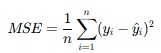

dimana yi, adalah nilai aktuan, nilai ^yi adalah nilai prediksi, dan n adalah jumlah sampel.

2. RMSE

222.jpg

RMSE memberikan nilai dalam skala yang sama dengan terget variable, membuatnya lebih mudah diinterpretasikan.

3. R-Squared (R^2)

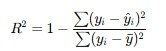

dimana 𝑦ˉ adalah rata-rata nilai aktual. Nilai R^2 mendekati 1 menunjukkan model yang lebih baik.